In [1]:
import matplotlib.pyplot as plt


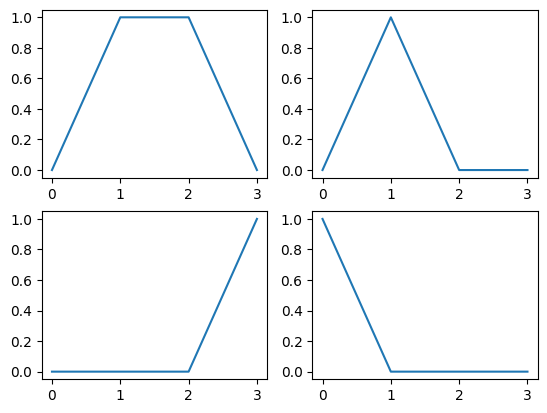

In [8]:
plt.subplot(2,2,1)
plt.plot([0,1,1,0])
plt.subplot(2,2,2)
plt.plot([0,1,0,0])
plt.subplot(2,2,3)
plt.plot([0,0,0,1])
plt.subplot(2,2,4)
plt.plot([1,0,0,0])
plt.show()

### Main code

Input files

In [72]:
#Path to input files

file_circuit = "./circuit"
file_fault = "./fault"

Function definitions

In [73]:
#Read fault file to get the condition to check for fault

def faults(file_fault):
    l=[]
    try:
        f = open(file_fault, 'r')
        for line in f.readlines():
            l.append(line.strip())

        fault_at = l[0].split('=')[1].strip()         # net where fault is supposed to have occured
        fault_type = l[1].split('=')[1].strip()       # type of Stuck At fault at the net

        return (fault_at, fault_type)

    except IOError:
        print("Could not open file")

    finally:
        f.close()

In [74]:
#Read the circuit file and print its contents

def circuits(file_circuit):
    try:
        with open(file_circuit, "r") as file:
          file_content = file.read()
          # file_content = file_content.replace(" ", "")
          print(file_content)

    except IOError:
        print("Could not open file")

    finally:
        file.close()

In [75]:
#Forward pass to get the actual output for a given input vector

def actual_output(A, B, C, D):
  inputs = [A, B, C, D]
  exec(file_content)
  binary_inputs = [bin(i)[2:] for i in inputs]
  print("Inputs:", binary_inputs)
  print(bin(Z & 1)[2:])

Main program

In [76]:
# initializing the input vector
A,B,C,D = 0,0,0,1

# function calls

fault_at, fault_type = faults(file_fault)
circuits(file_circuit)
actual_output(A, B, C, D)


net_e = A & B
net_f = C | D
net_g = ~ net_f
Z = net_g ^ net_e

Inputs: ['0', '0', '0', '1']
0


### Trial

In [63]:
with open(file_circuit, "r") as file:
    file_content = file.read()
    # file_content = file_content.replace(" ", "")
    print(file_content)

exec(file_content)
print(net_e, net_f, net_g, Z)

net_e = A & B
net_f = C | D
net_g = ~ net_f
Z = net_g ^ net_e

0 1 -2 -2


In [64]:
inputs = [A, B, C, D]
binary_inputs = [bin(i)[2:] for i in inputs]
# binary_outputs = [bin(Z & 1)[2:] for Z in [net_e, net_f, net_g, Z]]

print("Inputs:", binary_inputs)
# print("Outputs:", binary_outputs)
print(bin(Z & 1)[2:])

Inputs: ['0', '0', '0', '1']
0


In [ ]:
# if fault_type == 'SA0':
#     # fault_at = 1
#     pass
# elif fault_type == 'SA1':
#     # fault_at = 0
#     pass
# else:
#     print("No fault detected")